# Initialisation du système

Nous initialisons **une matrice** de $ N\_1dim*N\_1dim=N $ individus (nous nous aviserons donc de choisir N tel qu'il soit un carré parfait). De plus, nous modélisons un réseau discussion par **un dictionaire**, qui associe à chaque individu un tuple, de la forme $ dict[str:tuple[int,bool,float,float]] $. Celui-ci représentera intégralement un agent et ses caractéristiques.

On rappelle la description d'un agent : 

|Caractéristique||Nom    |Type   |Intervalle     |Valeur initiale  | Fixe ?    |
|:-------------:||:-----:|:-----:|:-------------:|:---------------:|:---------:|
|**Nom** : nom de l'agent (clé du dict)                                  ||**nom**    |str    |[str(0),str(N)]|str(k)|Oui|
|**Opinion** : y croit (1) ou non (0)                                    ||**op**     |int    |[0,1]          |0     |Non|
|**Déjà vu** : a déjà été confronté à la news (True) ou pas (False)      ||**deja_vu**|bool   |[True,False]   |False |Non|
|**Force de persuasion** : capacité à convaincre qqun (accrue qd tend vers 1) ||**fp**|float  |[0,1]          |Random|Oui|
|**Conviction** : caractérise la conviction à la news (tend vers 1) ou non (tend vers 0)||**p**|float  |[0,1] |0.5   |Non| 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as anim
import random

#description d'un agent : nom:(opinion, deja_vu , force_de_persuasion , conviction)
#                         nom:(   op  , deja_vu ,       fp            ,     p     )

N_1dim = 5     #nb de membres du réseau sur une dimension
N = N_1dim**2  #nb de membres du réseau discussion physique
nb_om = 3      #nb d'organismes médiatiques
nb_malv = 6    #nb d'agents malveillants
steps = 100    #nb de pas de temps
seuil = 0.3    #seuil

#Initialisation d'un réseau d'humains :
Reseau_discu={str(k):(0,False,fp,0.5) for k in range(1,N+1) for fp in np.random.uniform(low=0.0, high=1.0,size=N)}
Noms_reseau_discu=[k for k in range(N)]

#Initialisation d'un réseau avec des agents malveillants :
def init_sys_avec_malv(n_1dim,nb_malv):
    
    Pop={str(k):(0,False,fp,0.5) for k in range(1,N+1) for fp in np.random.uniform(low=0.0, high=1.0,size=N)}
    L=np.random.choice(range(1,(n_1dim**2)+1), size=nb_malv, replace=False)
    for e in L:
        Pop[str(e)]=(1,True,0.9,0.8)
    
    return Pop

Pop_malv=init_sys_avec_malv(N_1dim,nb_malv)
print('Réseau avec malveillants : \n',Pop_malv)

#Initialisation d'un système avec organismes médiatiques:
List_om=np.random.choice(range(1,(N_1dim**2)+1), size=nb_om, replace=False)
print(List_om)

def init_ac_om(reseau,list_om):
    for (name,(op,deja,fp,p)) in reseau.items():
        if name in list_om:
            reseau['OM'+str(name)]=(0,False,np.random.uniform(low=0.7,high=1.0),0.5)
            del reseau[name]
    return reseau

Pop_ac_om=init_ac_om(Reseau_discu,List_om)
print('Population avec médias : \n',Pop_ac_om)
        
#Représentation des agents en 2 dimensions (sur une matrice) :
Agents=np.arange(1,N_1dim*N_1dim+1).reshape(N_1dim,N_1dim)
print('Agents :\n',Agents)

#Réseau à valeurs quelconques (au milieu de la simulation par exemple) pour faire des tests :
Test_reseau={str(k):(np.random.choice([0,1]),np.random.choice([False,True]),np.random.random_sample(),np.random.random_sample()) for k in range(1,N+1)}

#Matrice des opinions de départ :
def matrice_opinions(reseau,n_1dim):
    Op=np.zeros((n_1dim,n_1dim))
    i=0
    j=0
    for (nom,(op,deja_vu,persu,p)) in reseau.items():
        Op[i,j]=int(op)
        if j<(n_1dim-1):
            j=j+1
        elif j==(n_1dim-1):
            j=0
            i=i+1
    return Op

print(matrice_opinions(Pop_malv,N_1dim))

#Matrice des convictions de départ
def matrice_convic(reseau,n_1dim):
    C=np.zeros((n_1dim,n_1dim))
    i=0
    j=0
    for (nom,(opinion,deja_vu,persu,p)) in reseau.items():
        C[i,j]=p
        if j<(n_1dim-1):
            j=j+1
        elif j==(n_1dim-1):
            j=0
            i=i+1
    return C

print(matrice_convic(Pop_malv,N_1dim))

#CONSULTATION A DISTANCE
#Réseaux sociaux :


Réseau avec malveillants : 
 {'10': (0, False, 0.4451023251527435, 0.5), '20': (0, False, 0.3932674116166889, 0.5), '1': (1, True, 0.9, 0.8), '9': (0, False, 0.5403697998369372, 0.5), '2': (1, True, 0.9, 0.8), '15': (0, False, 0.8903571754297299, 0.5), '5': (0, False, 0.4572711791188856, 0.5), '13': (0, False, 0.4173270116827381, 0.5), '4': (0, False, 0.9349725210594372, 0.5), '7': (0, False, 0.8422204618500932, 0.5), '18': (1, True, 0.9, 0.8), '24': (0, False, 0.11113435754765877, 0.5), '3': (0, False, 0.827478271711599, 0.5), '6': (0, False, 0.5365837189645093, 0.5), '17': (0, False, 0.18602108151541252, 0.5), '14': (1, True, 0.9, 0.8), '8': (0, False, 0.16462546112913679, 0.5), '21': (0, False, 0.7343315612371325, 0.5), '25': (1, True, 0.9, 0.8), '11': (0, False, 0.4166165692427104, 0.5), '16': (0, False, 0.4494392237035575, 0.5), '12': (0, False, 0.27043565363797095, 0.5), '22': (1, True, 0.9, 0.8), '19': (0, False, 0.7908960006936098, 0.5), '23': (0, False, 0.011193691557437324, 0

/usr/local/lib/python3.4/dist-packages/ipykernel_launcher.py:39: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison


# DISCUSSION PHYSIQUE

Dans cette première partie, nous nous concentrerons sur la propagation d'une fake news par le seul biais d'une interaction entre agents physiquement proches. Cette discussion pourra avoir lieu **entre 2 à 9 personnes**.

**Processus de discussion détaillé :** 
- **1ère étape : Mise à jour des convictions**  

A partir d'une matrice représentant l'ensemble de la population, nous sélectionnerons un agent et son voisinage pour créer une liste de 2 à 9 personnes : la **liste discussion**.
- si il n'y a que _2 personnes_ dans la liste discussion, seule la **force de persuasion** influera et ce sur un seul agent, celui dont la force de persuasion est la plus faible. Celle-ci est régie par la loi suivante : lorsque $  fp_i $ < $  fp_j $ on applique la formule: $ p_i \leftarrow p_i + fp_i  \cdot ( p_j - p_i ) $
- si la discussion comprend _de 3 à 9 personnes_, ce sera le **voisinage** qui influera sur la conviction de chacun selon la loi suivante. Chaque individu modifie sa conviction en fonction de la moyenne des convictions des autres pondérée de leur force de persuasion ($ moy = \frac{\sum p_i*fp_i}{\sum fp_i} $) et du seuil de persuasion $\sigma$ : si $ |p_i-moy| < \sigma $, alors $ p_i \leftarrow moy $ sinon, $p_i$ ne change pas.  

De plus, la conviction sera affectée par la **crédibilité de la news** $news$ par la loi suivante : $ p_i \leftarrow p_i + fp_i \cdot ( news - p_i ) $ 
- **2ème étape : Mise à jour des opinions**  
Pour chaque agent, on modifie son opinion en fonction de sa conviction : si $ p_i  > 0.5 $ , $op_i$ passe de $0$ à $1$ et inversement.

# I-) Facteurs modifiant les paramètres

## 1- Influence du voisinage sur p

### a) Création d'une liste discussion

In [2]:
#Sélection d'un agent et de son voisinage pour établir un discussion
def selection_voisinage(Matrice,n_1dim):
    '''Sélection aléatoire des voisinages d'un individu
    '''
    L=[]                               #liste voisinage (pers susceptibles de discuter)
    Ldiscu=[]                          #liste discussion (pers qui vont discuter)
    size=np.random.choice(range(2,10)) #nb pers discussion
    
    ic=np.random.choice(range(n_1dim)) #ic,jc : indices de l'agent central
    jc=np.random.choice(range(n_1dim))
    a_central=Matrice[ic,jc]
    
    if ic>0 and ic<(n_1dim-1) and jc>0 and jc<(n_1dim-1):
        L=np.reshape(Matrice[ic-1 : ic+2 , jc-1 : jc+2] , 9)        
    elif ic==0 and jc>0 and jc<(n_1dim-1):          #a_central sur arête sup
        L=[(Matrice[ic,jc-1 : jc+2])
           ,(Matrice[ic+1,jc-1 : jc+2])
           ,(Matrice[n_1dim-1, jc-1 : jc+2])]
        L=np.reshape(L,9)
    elif ic==(n_1dim-1) and jc>0 and jc<(n_1dim-1): #a_central sur arête inf
        L=[(Matrice[ic,jc-1 : jc+2])
           ,(Matrice[ic-1,jc-1 : jc+2])
           ,(Matrice[0, jc-1 : jc+2])]
        L=np.reshape(L,9)        
    elif jc==0 and ic>0 and ic<(n_1dim-1):          #a_central sur arête gauche
        L=[(Matrice[ic-1 : ic+2,jc])
           ,(Matrice[ic-1 : ic+2,jc+1])
           ,(Matrice[ic-1 : ic+2,n_1dim-1])]
        L=np.reshape(L,9)        
    elif jc==(n_1dim-1) and ic>0 and ic<(n_1dim-1): #a_central sur arête droite
        L=[(Matrice[ic-1 : ic+2,jc])
           ,(Matrice[ic-1 : ic+2,jc-1])
           ,(Matrice[ic-1 : ic+2,0])]
        L=np.reshape(L,9)        
    elif a_central==1:                              #a_central sur coin sup/gauche
        L=[n_1dim,a_central,2,n_1dim*2,n_1dim+1,n_1dim+2,n_1dim*n_1dim,n_1dim*(n_1dim-1)+1,n_1dim*(n_1dim-1)+2]
        L=np.array(L)        
    elif a_central==n_1dim:                                                    #a_central sur coin sup/droit
        L=[n_1dim-1,a_central,1,n_1dim*2-1,n_1dim*2,n_1dim+1,n_1dim*n_1dim-1,n_1dim*n_1dim,n_1dim*(n_1dim-1)+1]
        L=np.array(L)
    elif a_central==n_1dim*(n_1dim-1)+1:            #a_central sur coin inf/gauche
        L=[n_1dim*(n_1dim-1),Matrice[ic-1,jc],Matrice[ic-1,jc+1]
          ,n_1dim*n_1dim,a_central,Matrice[ic,jc+1]
          ,1,2,n_1dim]
        L=np.array(L)        
    elif a_central==(n_1dim*n_1dim):                #a_central sur coin inf/droit
        L=[a_central-n_1dim-1,a_central-n_1dim,Matrice[ic-1,0]
          ,a_central-1,a_central,a_central-n_1dim+1
          ,1,n_1dim-1,n_1dim]
        L=np.array(L)
    
    Ldiscu=np.random.choice(L,size,replace=False)
             
    return Ldiscu

Population=np.arange(1,N_1dim*N_1dim+1).reshape(N_1dim,N_1dim)
List_discu=selection_voisinage(Population,N_1dim)
print('Population :\n',Population)
print('Liste des personnes qui vont discuter :',List_discu)

Population :
 [[ 1  2  3  4  5]
 [ 6  7  8  9 10]
 [11 12 13 14 15]
 [16 17 18 19 20]
 [21 22 23 24 25]]
Liste des personnes qui vont discuter : [13 19 18 22 24 14 12]


### b) Modification des p des agents de la liste discussion

In [3]:
#Modification du paramètre p de x en fonction de la force de persuasion de y et vice versa :
def force_persu(x, y, reseau):
        
    opx,deja_vux,fpx,px=reseau[str(x)]
    opy,deja_vuy,fpy,py=reseau[str(y)]
    if fpx>fpy:
        py=py+fpy*(px-py)
    elif fpy>fpx:
        px=px+fpx*(py-px)
    
    reseau[str(x)]=(opx,True,fpx,px)
    reseau[str(y)]=(opy,True,fpy,py)
    
    return reseau


#Influence du voisinage :
    # si 2 personnes, force persu. Sinon, moyenne des p pondérée des fp; si abs(pi-moy)>seuil, pi=pi, sinon pi=moy
def influ_voisinage(list_discu,reseau,seuil):
    
    P=[]   #liste des convictions des membres de la discussion
    F=[]   #liste des forces de persuasion des membres de la discussion
    N=[]   #liste des noms des membres de la discussion
    i=0
    
    for k in list_discu:
        op_k,deja_k,fp_k,p_k=reseau[str(k)]
        N.append(int(k))
        P.append(p_k)
        F.append(fp_k)
            
    if len(N)==2:
        reseau=force_persu(N[0],N[1],reseau)
    else:
        for a in N:
            op_a,deja_a,fp_a,p_a=reseau[str(a)]
            other_p=P[0:a]+P[a+1:len(P)]
            other_fp=F[0:a]+F[a+1:len(F)]            
            moy=np.average(other_p,weights=other_fp)
            if abs(p_a-moy)<seuil:
                p_a=moy
            reseau[str(a)]=(op_a,True,fp_a,p_a)
    
            
    return reseau

print(influ_voisinage(List_discu,Test_reseau,seuil))

{'10': (0, False, 0.8738769975706981, 0.763589646586159), '20': (1, False, 0.517554894495258, 0.07118297461977097), '1': (1, True, 0.8815213236676099, 0.3163289940388603), '9': (0, False, 0.7988676939112486, 0.5286456329140724), '2': (1, False, 0.2706101537634189, 0.5095056960245328), '15': (0, True, 0.41184473635095376, 0.015534313688181256), '5': (0, True, 0.5904946826077287, 0.5329173177817438), '13': (0, True, 0.10913990198702128, 0.394597256585657), '4': (1, False, 0.4759794349798787, 0.001760414773876784), '7': (1, True, 0.7421671453939072, 0.37737873885334006), '18': (0, True, 0.17849121885536223, 0.007098343656064543), '24': (1, True, 0.35988392889421483, 0.05540309668943566), '3': (0, True, 0.634768577906627, 0.23244316172344837), '6': (1, False, 0.10453801192703638, 0.3571268460956435), '17': (0, False, 0.5430658582818023, 0.2473227293000968), '14': (0, True, 0.5910872344149585, 0.8331738068070267), '8': (0, True, 0.8459803816823661, 0.5646662493619832), '21': (1, False, 0.70

# II-) Simulation

In [4]:
def simulation_op(reseau,n_1dim,mat_pop,names,steps,seuil):
    """retourne la matrice des OPINIONS de la population après un certain nb d'étapes"""
    
    M=matrice_opinions(reseau,n_1dim)
    results=[]
    results.append(M.copy())
    
    for simu in range(steps):
        i=np.random.choice(names)
        List_discu=selection_voisinage(mat_pop,n_1dim)
        Res_p_changé=influ_voisinage(List_discu,reseau,seuil)
        for c in Res_p_changé:
            op,deja,fp,p=Res_p_changé[c]
            if p>0.5 and op==0:
                op=1
                Res_p_changé[c]=(op,deja,fp,p)
            elif p<0.5 and op==1:
                op=0
                Res_p_changé[c]=(op,deja,fp,p)
        Op=[]
        P=[]
        for e in Res_p_changé:
            op,deja,fp,p=Res_p_changé[e]
            Op.append(op)
            P.append(p)
        Op_final=np.reshape(Op, (n_1dim,n_1dim))
        P_final=np.reshape(P, (n_1dim,n_1dim))
        results.append(Op_final.copy())
        
    return results

simulation_op(init_sys_avec_malv(N_1dim,nb_malv),N_1dim,Population,Noms_reseau_discu,steps,seuil)

[array([[1., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0.],
        [0., 0., 0., 1., 0.],
        [1., 0., 0., 1., 0.],
        [0., 0., 0., 1., 0.]]), array([[1, 0, 0, 0, 0],
        [0, 0, 1, 0, 0],
        [0, 0, 0, 1, 0],
        [1, 0, 0, 1, 0],
        [0, 0, 0, 1, 0]]), array([[1, 1, 0, 0, 0],
        [0, 0, 1, 0, 1],
        [0, 0, 0, 1, 1],
        [1, 0, 0, 1, 1],
        [1, 1, 0, 1, 0]]), array([[1, 1, 0, 1, 1],
        [0, 0, 1, 1, 1],
        [0, 0, 1, 1, 1],
        [1, 1, 0, 1, 1],
        [1, 1, 0, 1, 0]]), array([[1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1],
        [0, 0, 1, 1, 1],
        [1, 1, 0, 1, 1],
        [1, 1, 0, 1, 0]]), array([[1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1],
        [1, 0, 1, 1, 1],
        [1, 1, 1, 1, 1],
        [1, 1, 1, 1, 0]]), array([[1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1],
        [1, 0, 1, 1, 1],
        [1, 1, 1, 1, 1],
        [1, 1, 1, 1, 0]]), array([[1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1],
        [1, 1, 1, 

In [5]:
def simulation_p(reseau,n_1dim,mat_pop,names,steps,seuil):
    """retourne la matrice des CONVICTIONS de la population après un certain nb d'étapes"""
    
    M=matrice_convic(reseau,n_1dim)
    results=[]
    results.append(M.copy())
    
    for simu in range(steps):
        i=np.random.choice(names)
        List_discu=selection_voisinage(mat_pop,n_1dim)
        Res_p_changé=influ_voisinage(List_discu,reseau,seuil)
        for c in Res_p_changé:
            op,deja,fp,p=Res_p_changé[c]
            if p>0.5 and op==0:
                op=1
                Res_p_changé[c]=(op,deja,fp,p)
            elif p<0.5 and op==1:
                op=0
                Res_p_changé[c]=(op,deja,fp,p)
        Op=[]
        P=[]
        for e in Res_p_changé:
            op,deja,fp,p=Res_p_changé[e]
            Op.append(op)
            P.append(p)
        Op_final=np.reshape(Op, (n_1dim,n_1dim))
        P_final=np.reshape(P, (n_1dim,n_1dim))
        results.append(P_final.copy())
        
    return results

simulation_p(init_sys_avec_malv(N_1dim,nb_malv),N_1dim,Population,Noms_reseau_discu,steps,seuil)

[array([[0.5, 0.8, 0.8, 0.5, 0.5],
        [0.5, 0.5, 0.5, 0.8, 0.5],
        [0.5, 0.8, 0.5, 0.5, 0.5],
        [0.8, 0.5, 0.5, 0.5, 0.8],
        [0.5, 0.5, 0.5, 0.5, 0.5]]),
 array([[0.5       , 0.8       , 0.8       , 0.55864639, 0.5       ],
        [0.5       , 0.5       , 0.55864639, 0.8       , 0.55887195],
        [0.55864639, 0.8       , 0.5       , 0.5       , 0.55864639],
        [0.55864639, 0.56705304, 0.5       , 0.5       , 0.8       ],
        [0.5       , 0.55864639, 0.5       , 0.55864639, 0.5       ]]),
 array([[0.5       , 0.8       , 0.8       , 0.55864639, 0.5       ],
        [0.5       , 0.60271218, 0.55864639, 0.8       , 0.55887195],
        [0.55864639, 0.60271218, 0.64030502, 0.5       , 0.55864639],
        [0.55864639, 0.56705304, 0.5       , 0.60271218, 0.8       ],
        [0.5       , 0.55864639, 0.5       , 0.60271218, 0.5       ]]),
 array([[0.60117437, 0.60117437, 0.8       , 0.60117437, 0.5       ],
        [0.60117437, 0.60271218, 0.60117437, 0.8 

# III-) Affichage

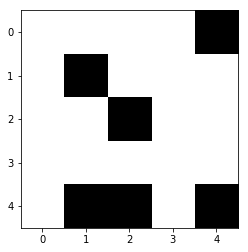

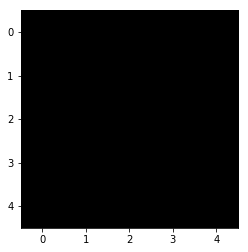

In [19]:
Simulation_op=simulation_op(init_sys_avec_malv(N_1dim,nb_malv),N_1dim,Population,Noms_reseau_discu,100,seuil)

#Affichage des opinions de départ
Opinions_start=Simulation_op[0]
fig=plt.figure()
im=plt.imshow(Opinions_start,cmap='binary',vmin=0,vmax=1)

#Affichage des opinions d'arrivée
Opinions_end=Simulation_op[-1]
fig=plt.figure()
im=plt.imshow(Opinions_end,cmap='binary',vmin=0,vmax=1)

#noir = 1 ; blanc = 0

In [ ]:
import matplotlib.animation as animation
import matplotlib.pyplot as plt
from IPython.core.display import HTML


fig=plt.figure()

Simulation_op=simulation_op(init_sys_avec_malv(N_1dim,nb_malv),N_1dim,Population,Noms_reseau_discu,1000,seuil)

#Affichage des opinions de départ

im=plt.imshow(Simulation_op[0],cmap='binary',vmin=0,vmax=1)


def updatefig(i):
    im.set_array(Simulation_op[i+1])
    return im,

ani = animation.FuncAnimation(fig, updatefig, frames=range(1000), interval=50, blit=False)
HTML(ani.to_html5_video())
# Pour sauvegarder la vidéo dans un fichier externe
#ani.save('test.mp4', fps=30, extra_args=['-vcodec', 'libx264'])

plt.show()

In [35]:


%%HTML
<video width="320" height="240" controls>
  <source src="simu_op.mp4" type="video/mp4">
</video>

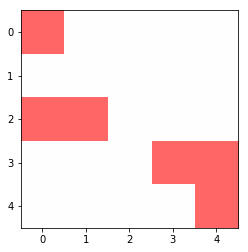

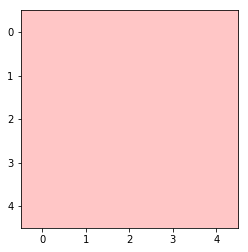

In [7]:
Simulation=simulation_p(init_sys_avec_malv(N_1dim,nb_malv),N_1dim,Population,Noms_reseau_discu,500,seuil)

#Affichage des convictions de départ (bleu -> 0 ; rouge -> 1 ; blanc=0.5)

Convictions_start=Simulation[0]
fig=plt.figure()
im=plt.imshow(Convictions_start,cmap='bwr',vmin=0,vmax=1)

#Affichage des convictions de fin de simulation

Convictions_end=Simulation[-1]
fig=plt.figure()
im=plt.imshow(Convictions_end,cmap='bwr',vmin=0,vmax=1)


In [ ]:
fig=plt.figure()

Simulation_p=simulation_p(init_sys_avec_malv(N_1dim,nb_malv),N_1dim,Population,Noms_reseau_discu,1000,seuil)

#Affichage des opinions de départ

im=plt.imshow(Simulation_p[0],cmap='bwr',vmin=0,vmax=1)


def updatefig(i):
    im.set_array(Simulation_p[i+1])
    return im,

ani = animation.FuncAnimation(fig, updatefig, frames=range(1000), interval=50, blit=False)
HTML(ani.to_html5_video())
# Pour sauvegarder la vidéo dans un fichier externe
ani.save('simu_p.mp4', fps=30, extra_args=['-vcodec', 'libx264'])

plt.show()


In [34]:

%%HTML
<video width="320" height="240" controls>
  <source src="simu_p.mp4" type="video/mp4">
</video>

# CONSULTATION A DISTANCE

In [8]:
#Influence crébibilité news sur le p d'une personne
news = np.random.random_sample()
print('Crédibilité de l\'info:',news)

def influ_credib_news(news,p,fp):
    #news: crédibilité de la news
    #p: param déterminant le chgt ou non de l'opinion    
    i = p
    i = i+fp*(news-i)
    return i

print(influ_credib_news(news,0.5,0.75))

Crédibilité de l'info: 0.9710315154470527
0.8532736365852895
